     ID  Year Sold   Property Type  Age   Building Size Lot Size  \
0     1       2010  detached house    45           3800     8000   
1     2       2010       townhouse    23           2100      NaN   
2     3       2010       townhouse    34           1850      NaN   
3     4       2010  detached house    32           2950    10500   
4     5       2010       apartment    14            820      NaN   
..  ...        ...             ...   ...            ...      ...   
95   96       2019  detached house    15           3200    10000   
96   97       2019       townhouse    28           1650      NaN   
97   98       2019  detached house    46           2300     6300   
98   99       2019  detached house    20           2950     9000   
99  100       2019       townhouse    16           2300      NaN   

          Neighbrhood  # of bedrooms  # of bathrooms special feature Pool  \
0           Deep Cove              4               3       waterview   No   
1      Lower Lonsdale        

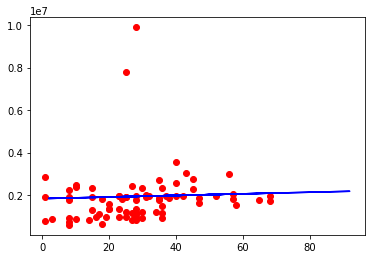

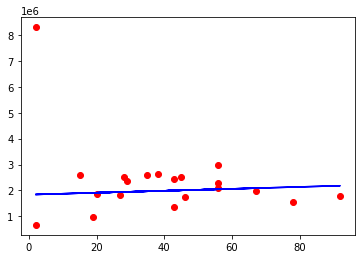

[[1250261.28  840000.  ]
 [2581153.99 2300000.  ]
 [2206666.03 1975000.  ]
 [1233294.46 1160000.  ]
 [1130889.83 1480000.  ]
 [1531625.97 1580000.  ]
 [ 561078.71  780000.  ]
 [2276354.93 1860000.  ]
 [2878073.34 2980000.  ]
 [1966101.51 1850000.  ]
 [ 852953.16 1360000.  ]
 [1670594.31 1180000.  ]
 [1500926.1  1160000.  ]
 [2090927.33 2350000.  ]
 [1936609.06 1910000.  ]
 [2483988.5  2600000.  ]
 [2592256.97 1990000.  ]
 [ 557241.23  670000.  ]
 [2361189.03 1650000.  ]
 [2152531.8  1820000.  ]]
[[1116400.95 1150000.  ]
 [1701342.89 1980000.  ]
 [1524911.9  1550000.  ]
 [1880492.34 1970000.  ]
 [2397753.5  9900000.  ]
 [1721700.78 2530000.  ]
 [1390549.82 1205000.  ]
 [1729843.94 1220000.  ]
 [1370191.93 1360000.  ]
 [1648412.38 2470000.  ]
 [1390549.82  970000.  ]
 [2385538.76 7800000.  ]
 [1959205.45 1890000.  ]
 [3187810.4  2980000.  ]
 [1439408.76 1950000.  ]
 [1463838.23 1360000.  ]
 [1398692.98 1160000.  ]
 [2867338.12 1780000.  ]
 [2466970.33 2750000.  ]
 [1370191.93 1360000.  ]

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

housing_data = pd.read_csv('House_Data.csv')
df = pd.DataFrame(housing_data)
print(df)
print(df.dtypes)

df['Price Sold'] = df['Price Sold'].str.replace(',', '').astype(int) 

x_one = df.iloc[:, 3:4].values
y_one = df.iloc[:, -1].values
print(x_one)
print(y_one)

x_two = df.iloc[:, 3:5].values
y_two = df.iloc[:, -1].values
print(x_two)
print(y_two)

x_three = df.iloc[:, [3,7,8]].values
y_three = df.iloc[:, -1].values
print(x_three)
print(y_three)

x_four = df.iloc[:, [1,3,4,7,8]].values
y_four = df.iloc[:, -1].values
print(x_four)
print(y_four)

from sklearn.model_selection import train_test_split
x_one_train, x_one_test, y_one_train, y_one_test = train_test_split(x_one, y_one, test_size = 0.2)
x_two_train, x_two_test, y_two_train, y_two_test = train_test_split(x_two, y_two, test_size = 0.2)
x_three_train, x_three_test, y_three_train, y_three_test = train_test_split(x_three, y_three, test_size = 0.2)
x_four_train, x_four_test, y_four_train, y_four_test = train_test_split(x_four, y_four, test_size = 0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
mlr_one = LinearRegression()
mlr_two = LinearRegression()
mlr_three = LinearRegression()
lr.fit(x_one, y_one)
mlr_one.fit(x_two, y_two)
mlr_two.fit(x_three, y_three)
mlr_three.fit(x_four, y_four)

y_pred_lr = lr.predict(x_one_test)
y_pred_mlr = mlr_one.predict(x_two_test)
y_pred_mlr_two = mlr_two.predict(x_three_test)
y_pred_mlr_three = mlr_three.predict(x_four_test)

plt.scatter(x_one_train, y_one_train, color = 'red')
plt.plot(x_one_test, lr.predict(x_one_test), color = 'blue')
plt.show()

plt.scatter(x_one_test, y_one_test, color = 'red')
plt.plot(x_one_test, lr.predict(x_one_test), color = 'blue')
plt.show()

np.set_printoptions(precision = 2)
print(np.concatenate((y_pred_mlr.reshape(len(y_pred_mlr), 1),
                      y_two_test.reshape(len(y_two_test), 1)),
                     1))

print(np.concatenate((y_pred_mlr_two.reshape(len(y_pred_mlr_two), 1),
                      y_three_test.reshape(len(y_three_test), 1)),
                     1))

print(np.concatenate((y_pred_mlr_three.reshape(len(y_pred_mlr_three), 1),
                      y_four_test.reshape(len(y_four_test), 1)),
                     1))

from sklearn.metrics import r2_score
print(r2_score(y_one_test, y_pred_lr))
print(r2_score(y_two_test, y_pred_mlr))
print(r2_score(y_three_test, y_pred_mlr_two))
print(r2_score(y_four_test, y_pred_mlr_three))

x_test = df.iloc[:, :-1].values 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
x_ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [2])], remainder = 'passthrough')
x_test = np.array(x_ct.fit_transform(x_test))
print(x_test)
